## Fetch content used

Fetch content from website.

Archives are used to keep version.

Genre: news (column)

Languages: English, Chinese(Simplified).

In [1]:
#the function to extract content from web
import requests
from lxml import html
def fetchWebpage(url, xpath_expression):
    # Fetch the webpage
    response = requests.get(url)
    if response.status_code == 200:
        # Parse the HTML content
        tree = html.fromstring(response.content)
        # Use XPath to extract content
        extracted_content = tree.xpath(xpath_expression)
        return extracted_content
    else:
        print(f"Failed to fetch the webpage. Status code: {response.status_code}")
        return None


In [2]:
#the English content
urlContentEn='https://web.archive.org/web/20240102011418/https://www.economist.com/asia/2023/12/13/hsiao-bi-khim-is-taiwans-cat-warrior'
xpathContentEn='//section[@data-body-id="cp2"]/div/p//text()'
x=fetchWebpage(urlContentEn,xpathContentEn)
contentEn=''.join(x[5:-9])

In [3]:
urlContentZh='https://web.archive.org/web/20240203015903/https://telegra.ph/%E8%B4%BA%E7%8F%91%E5%A4%9C%E5%A4%9C%E7%A7%80%E5%8F%97%E5%8F%B0%E5%B9%B4%E8%BD%BB%E4%BA%BA%E7%83%AD%E6%8D%A7%E5%A4%A7%E9%80%89%E5%89%8D%E5%90%8E%E9%82%A3%E4%B8%AA%E8%8D%A4%E7%B4%A0%E4%B8%8D%E5%BF%8C%E6%B2%A1%E5%9C%A8%E6%80%95%E7%9A%84%E6%B0%94%E5%9C%BA---%E7%AB%AF%E4%BC%A0%E5%AA%92---%E6%9C%80%E6%96%B0-01-16-2'
xpathContentZh='//article//p//text()'
x=fetchWebpage(urlContentZh,xpathContentZh)
contentZh=''.join(x[2:-5])

In [4]:
#Remove content in brackets
import re
contentEn = re.sub(r'\(.*?\)','',contentEn)
contentZh = re.sub(r'（.*?\）','',contentZh)

## Processing English content

This include the following steps:

- Tokenising
- Count the frequency
- Count the lenth of word
- Draw the table

the data structure is planned below:
`[["word",freq,length]...]`

In [5]:
enWords=re.findall(r'\w+',contentEn.lower()) #doing it manually is just enough :)
enFreq = {}
for word in enWords:
    if word in enFreq:
        enFreq[word] += 1
    else:
        enFreq[word] = 1
enFreqLen = [[key,value,len(key)] for key, value in enFreq.items()]

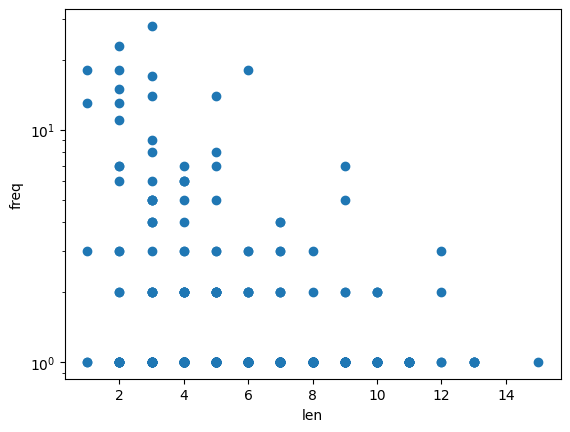

In [6]:
import matplotlib.pyplot as plt
_, freq, leng = zip(*enFreqLen)
plt.scatter(leng,freq)
plt.xlabel('len')
plt.ylabel('freq')
plt.yscale('log')
plt.show()

## Processing Chinese content

This include the following steps:

- Tokenising (Chinese splitting word)
- Count the frequency
- Count the lenth of word
- Draw the table

the data structure is planned below:
`[["word",freq,length]...]`

In chinese there is not space between words, so we have to use [a library](https://github.com/fxsjy/jieba) first to split words.

In [7]:
import jieba
zhWords = jieba.cut(contentZh,use_paddle=True) #use jieba to cut words
zhWords = list(filter(lambda e: bool(re.fullmatch(r'[\u3400-\u4dbf\u4e00-\u9fff]+',e)), zhWords)) #remove non Chinese script items, incuding puctuations and English words

Building prefix dict from the default dictionary ...
DEBUG:jieba:Building prefix dict from the default dictionary ...
Dumping model to file cache /tmp/jieba.cache
DEBUG:jieba:Dumping model to file cache /tmp/jieba.cache
Loading model cost 2.012 seconds.
DEBUG:jieba:Loading model cost 2.012 seconds.
Prefix dict has been built successfully.
DEBUG:jieba:Prefix dict has been built successfully.


In [8]:
zhFreq = {}
for word in zhWords:
    if word in zhFreq:
        zhFreq[word] += 1
    else:
        zhFreq[word] = 1
zhFreqLen = [[key,value,len(key)] for key, value in zhFreq.items()]

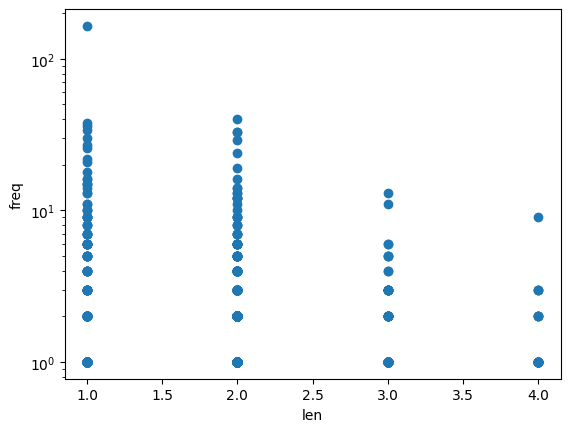

In [9]:
import matplotlib.pyplot as plt
_, freq, leng = zip(*zhFreqLen)
plt.scatter(leng,freq)
plt.xlabel('len')
plt.ylabel('freq')
plt.yscale('log')
plt.show()